# Diamonds Exploration by Chris Saden

Original: https://s3.amazonaws.com/content.udacity-data.com/courses/ud651/diamondsExample_2016-05.html

> **Tip:** You will see quoted blocks like this throughout this example project with tips for constructing your reports. You should consider these quoted sections as outside of the example structure.

This report explores a dataset containing prices and attributes for approximately 54,000 diamonds.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('Set2', n_colors=10)

In [3]:
diamonds = pd.read_csv('diamondsbig.csv',
                       usecols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
                       
                      )
diamonds.count()

carat      598024
cut        598024
color      598024
clarity    598024
table      598024
depth      598024
price      597311
x          596209
y          596172
z          595480
dtype: int64

In [4]:
diamonds = diamonds.sample(n=53940, random_state = 10)
diamonds.count()

carat      53940
cut        53940
color      53940
clarity    53940
table      53940
depth      53940
price      53862
x          53786
y          53785
z          53723
dtype: int64

In [5]:
diamonds.fillna({'x':0, 'y':0, 'z':0}, inplace=True).dropna(inplace=True)
diamonds.count()

carat      53862
cut        53862
color      53862
clarity    53862
table      53862
depth      53862
price      53862
x          53862
y          53862
z          53862
dtype: int64

## Univariate Plots Section

In [6]:
diamonds.describe(include = 'all')

,carat,cut,color,clarity,table,depth,price,x,y,z
count,53862.000000,53862,53862,53862,53862.000000,53862.000000,53862.000000,53862.000000,53862.000000,53862.000000
unique,NaN,3,9,9,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33150,8538,10591,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.065700,NaN,NaN,NaN,57.625732,61.030337,8701.934741,5.964754,6.168908,4.007084
std,0.811325,NaN,NaN,NaN,5.024904,7.754929,13100.226060,1.562478,1.517583,1.252726
min,0.200000,NaN,NaN,NaN,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000
25%,0.500000,NaN,NaN,NaN,56.000000,61.000000,1198.000000,4.730000,4.950000,3.100000
50%,0.850000,NaN,NaN,NaN,58.000000,62.100000,3420.000000,5.760000,6.020000,3.850000
75%,1.470000,NaN,NaN,NaN,59.000000,62.700000,10883.750000,6.950000,7.200000,4.600000


In [7]:
diamonds['cut'].value_counts()

Ideal     33150
V.Good    15336
Good       5376
Name: cut, dtype: int64

In [8]:
diamonds['color'].value_counts()

G    8538
E    8461
F    8450
H    7843
D    6486
I    6419
J    4516
K    2230
L     919
Name: color, dtype: int64

In [9]:
diamonds['clarity'].value_counts()

SI1     10591
VS2      9975
SI2      9306
VS1      8881
VVS2     5931
VVS1     4909
IF       2738
I1       1318
I2        213
Name: clarity, dtype: int64

Our dataset consists of ten variables, with almost 54,000 observations.

In [10]:
diamonds['price_log10'] = np.log10(diamonds['price'])

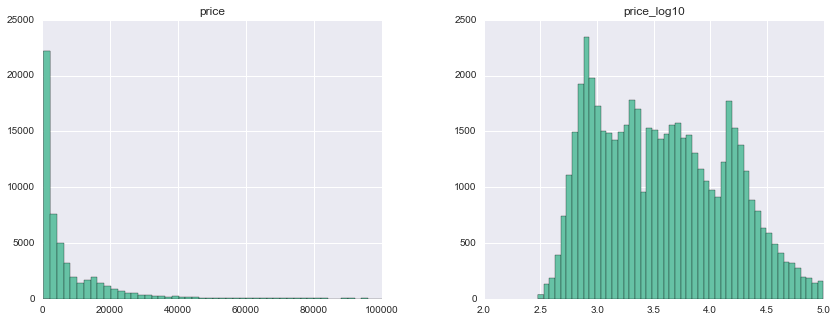

In [11]:
ax = diamonds[['price', 'price_log10']].hist(bins = 50, figsize = (14, 5))

Transformed the long tail data to better understand the distribution of price. The tranformed price distribution appears bimodal with the price peaking around 800 or so and again at 5000 or so. Why is there a gap at 1500? Are there really no diamonds with that price? I wonder what this plot looks like across the categorical variables of cut, color, and clarity.

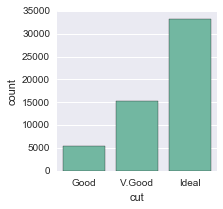

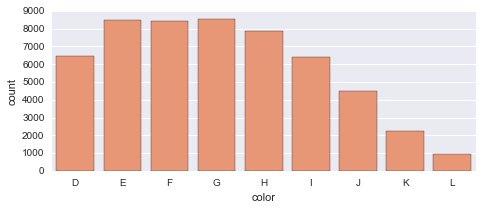

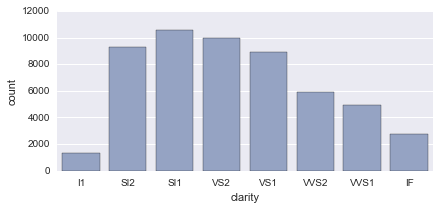

In [12]:
g = sns.factorplot('cut', data=diamonds, size=3, aspect=1, order = ['Good', 'V.Good', 'Ideal'], kind='count', color=sns.color_palette()[0])
g = sns.factorplot('color', data=diamonds, size=3, aspect=2.2, order = list('DEFGHIJKL'), kind='count', color=sns.color_palette()[1])
g = sns.factorplot('clarity', data=diamonds, size=3, aspect=2, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], kind='count', color=sns.color_palette()[2])

Most diamonds are of ideal cut, with gradually fewer diamonds of lesser-quality cut. A majority of diamonds are of color G or better (lower letters are of better color). Clarity is skewed to the right, with most diamonds of lower clarity VS2 or worse.

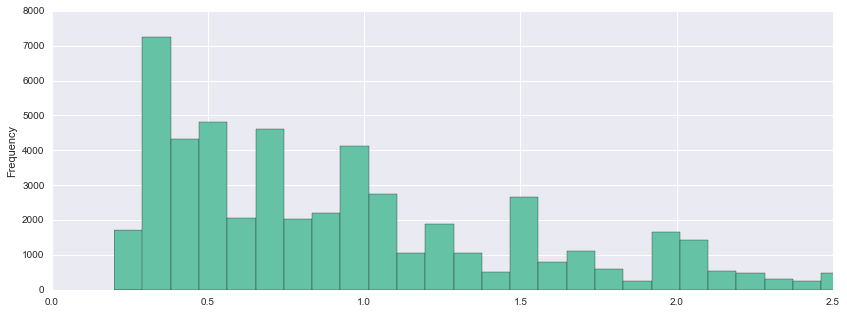

In [13]:
ax = diamonds['carat'].plot.hist(bins=100, xlim=(0, 2.5), figsize=(14,5))

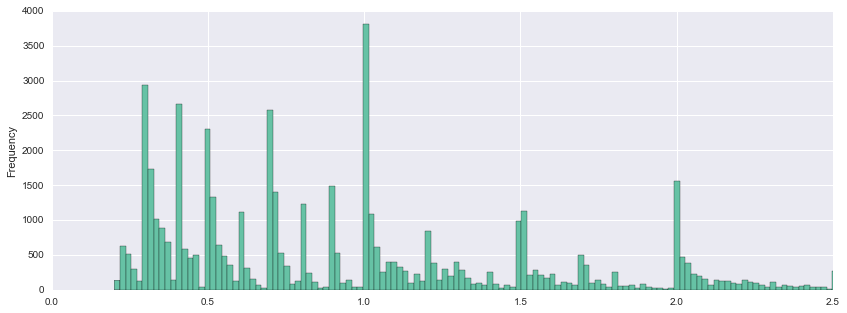

In [14]:
ax = diamonds['carat'].plot(kind='hist', bins=500, xlim=(0, 2.5), figsize=(14,5))

In [15]:
diamonds['carat'].describe()

count    53862.000000
mean         1.065700
std          0.811325
min          0.200000
25%          0.500000
50%          0.850000
75%          1.470000
max          9.250000
Name: carat, dtype: float64

In [16]:
diamonds['carat'].value_counts().sort_values(ascending=False).head(30)

0.30    2932
0.70    2548
0.50    2265
1.01    2160
0.40    2025
1.00    1654
0.90    1469
0.31    1061
2.01    1045
1.50     976
0.71     934
0.80     902
0.51     884
1.51     801
0.60     795
1.02     671
0.32     671
0.41     642
0.23     590
0.33     531
2.00     521
1.20     512
0.35     501
0.34     489
0.72     472
2.02     466
1.70     461
0.52     451
1.03     414
0.91     410
Name: carat, dtype: int64

The lightest diamond is 0.2 carat and the heaviest diamond is 5.0100. Above, I plot the main body of carat weights, trimming the highest-carat diamonds. Some carat weights occur more often than other carat weights. Many of the most common carat counts end in x.x0 or x.x1. I wonder how carat is connected to price, and I wonder if the carat values are specific to certain cuts of diamonds.

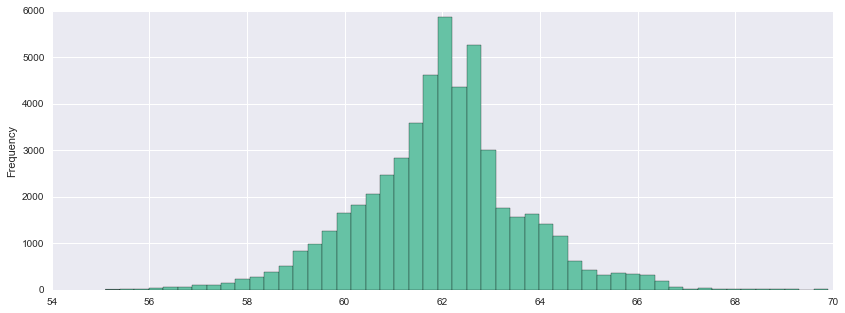

In [17]:
index = (diamonds['depth'] > 55)&(diamonds['depth'] < 70)
ax = diamonds[index]['depth'].plot.hist(bins=50, figsize=(14,5))

In [18]:
diamonds['depth'].describe()

count    53862.000000
mean        61.030337
std          7.754929
min          0.000000
25%         61.000000
50%         62.100000
75%         62.700000
max         74.400000
Name: depth, dtype: float64

In [19]:
diamonds['depth'].value_counts().sort_values(ascending=False).head(15)

62.4    2201
62.3    2163
62.2    2091
62.5    1991
62.1    1961
62.0    1825
62.6    1706
61.9    1671
62.7    1566
61.8    1504
61.7    1455
61.6    1273
62.8    1239
61.5    1221
61.4    1089
Name: depth, dtype: int64

Most diamonds have a depth between 60 mm and 65 mm: median 62 mm and mean 61.13 mm.

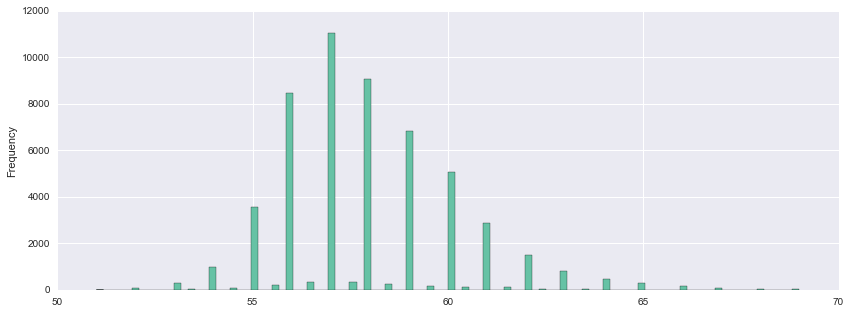

In [20]:
index = (diamonds['table'] > 50)&(diamonds['table'] < 70)
ax = diamonds[index]['table'].plot.hist(bins=100, figsize=(14,5))

In [21]:
diamonds['table'].describe()

count    53862.000000
mean        57.625732
std          5.024904
min          0.000000
25%         56.000000
50%         58.000000
75%         59.000000
max         72.000000
Name: table, dtype: float64

In [22]:
diamonds['table'].value_counts().sort_values(ascending=False).head(10)

57.0    11053
58.0     9086
56.0     8459
59.0     6829
60.0     5053
55.0     3568
61.0     2872
62.0     1517
54.0      971
63.0      799
Name: table, dtype: int64

Setting the binwidth indicates that most table values are integers. Most diamonds have a table between 55 mm and 60 mm. Again, I wonder if this has anything to do with the cut of a diamond. Cut is a quality of a diamond that may influence carat weight and is responsible for making a diamond sparkle. There’s likely to be strong relationships among carat, table, cut, and price.

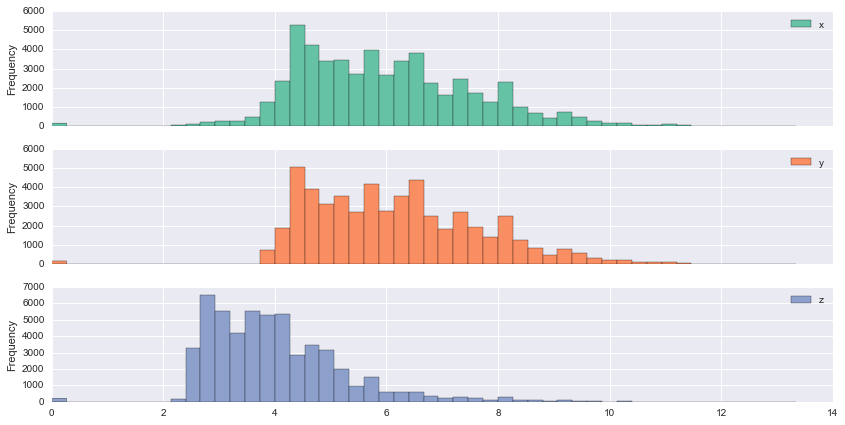

In [23]:
ax = diamonds[['x', 'y', 'z']].plot.hist(bins = 50, figsize = (14, 7), subplots=True)

In [24]:
diamonds[['x', 'y', 'z']].describe()

,x,y,z
count,53862.000000,53862.000000,53862.000000
mean,5.964754,6.168908,4.007084
std,1.562478,1.517583,1.252726
min,0.000000,0.000000,0.000000
25%,4.730000,4.950000,3.100000
50%,5.760000,6.020000,3.850000
75%,6.950000,7.200000,4.600000
max,13.240000,13.330000,12.620000


Most diamonds have an x dimension between 4 mm and 7 mm, a y dimension between 4 mm and 7 mm, and a z dimension between 2 mm and 6 mm. The y- and z- plots have a few high outliers so let’s zoom in.

Zooming in, we see that there are a few conspicuous points at value 0 in each of the three x, y, and z plots. Let’s investigate this further by finding these diamonds.

In [25]:
(diamonds['x'] == 0).value_counts()

False    53708
True       154
Name: x, dtype: int64

In [26]:
(diamonds['y'] == 0).value_counts()

False    53707
True       155
Name: y, dtype: int64

In [27]:
(diamonds['z'] == 0).value_counts()

False    53645
True       217
Name: z, dtype: int64

There are 154 diamonds with missing x values, 155 diamonds with missing y values, and 217 diamonds with missing z values.

In [28]:
diamonds[diamonds['z'] == 0].head(10)

,carat,cut,color,clarity,table,depth,price,x,y,z,price_log10
495399,2.03,Ideal,I,VS1,55.0,62.9,21498.0,8.08,8.12,0.0,4.332398
572547,2.14,Ideal,G,VS2,59.0,61.7,26230.0,8.22,8.27,0.0,4.418798
161909,0.41,Ideal,G,VVS1,0.0,0.0,1330.0,0.00,0.00,0.0,3.123852
271384,0.80,V.Good,I,VVS2,56.0,63.2,2883.0,5.86,5.89,0.0,3.459845
146214,0.40,V.Good,F,VS1,0.0,0.0,1190.0,0.00,0.00,0.0,3.075547
530563,1.55,V.Good,H,VVS2,60.0,59.9,14203.0,0.00,0.00,0.0,4.152380
292812,0.84,Ideal,I,VS1,57.0,62.5,3348.0,6.00,6.03,0.0,3.524785
210292,0.70,Ideal,K,VVS1,59.0,62.5,1873.0,5.68,5.63,0.0,3.272538
151937,0.40,Ideal,G,VS1,0.0,0.0,1238.0,0.00,0.00,0.0,3.092721
318083,0.90,V.Good,G,SI1,57.0,63.9,3999.0,6.09,6.02,0.0,3.601951


In [29]:
diamonds[diamonds['z'] == 0]['price'].describe()

count      217.000000
mean     10939.843318
std      16818.166451
min        446.000000
25%       2053.000000
50%       3810.000000
75%      13601.000000
max      94849.000000
Name: price, dtype: float64

In [30]:
diamonds['price'].describe()

count    53862.000000
mean      8701.934741
std      13100.226060
min        300.000000
25%       1198.000000
50%       3420.000000
75%      10883.750000
max      99930.000000
Name: price, dtype: float64

Comparing the diamonds in this subset to all other diamonds, these diamonds tend to be very expensive or fall in the third quartile of the entire diamonds data set. Other variables such as carat, depth, table, and price are reported so I’ll assume those values can be trusted.

In [31]:
diamonds['clarity'].value_counts()

SI1     10591
VS2      9975
SI2      9306
VS1      8881
VVS2     5931
VVS1     4909
IF       2738
I1       1318
I2        213
Name: clarity, dtype: int64

Let's subset the diamonds with high quality in color, clarity, and cut. Let’s compare the prices (first summary) and prices per carat (second summary) to the diamonds with consistently low quality classes.

In [32]:
best_quality = (diamonds['color'] == 'G')&(diamonds['cut']=='Ideal')&(diamonds['clarity']=='SI1')
worst_quality = (diamonds['color'] == 'L')&(diamonds['cut']=='Good')&(diamonds['clarity']<>'SI1')   

In [33]:
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

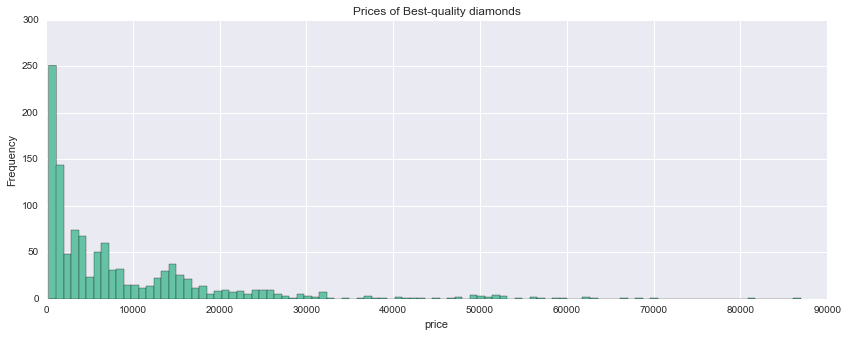

In [34]:
ax = diamonds[best_quality]['price'].plot.hist(bins=100, figsize=(14, 5), title = 'Prices of Best-quality diamonds')
ax = ax.set(xlabel = 'price')

In [35]:
diamonds[best_quality]['price_per_carat'].describe()

count     1143.000000
mean      5593.586600
std       3429.287492
min       1250.000000
25%       2701.063830
50%       4625.490196
75%       7479.203779
max      21675.062344
Name: price_per_carat, dtype: float64

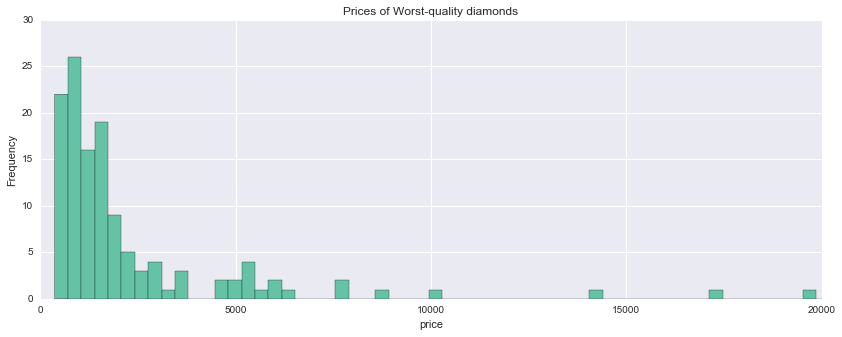

In [36]:
ax = diamonds[worst_quality]['price'].plot.hist(bins=200, figsize=(14, 5), title = 'Prices of Worst-quality diamonds', xlim=(0,20000))
res = ax.set(xlabel = 'price')

In [37]:
diamonds[worst_quality]['price_per_carat'].describe()

count      138.000000
mean      2744.952215
std       2211.520609
min        800.000000
25%       1560.671642
50%       1977.294292
75%       2997.016129
max      13622.376238
Name: price_per_carat, dtype: float64

There are a lot fewer diamonds which score low in all of color, clarity, and cut. The price per carat also seems to be significantly lower for the worst diamonds compared to the best diamonds, even if the regular price ranges are fairly similar. Later in my analysis, I’m going create density plots that are similar to the price histograms earlier to examine the price for each level of cut, color, and clarity.

What about the volume of a diamond? Does it have any relationships with price and other variables in the data set? I’m going to use a rough approximation of volume by using x * y * z to approximate a diamond as if it were a rectangular prism, basically a box.

In [38]:
diamonds['volume'] = diamonds.x * diamonds.y * diamonds.z

In [39]:
(diamonds['volume'] == 0).value_counts()

False    53561
True       301
Name: volume, dtype: int64

In [40]:
diamonds[diamonds['volume'] == 0].head(30)

,carat,cut,color,clarity,table,depth,price,x,y,z,price_log10,price_per_carat,volume
418491,1.63,Ideal,H,SI2,58.0,63.0,8331.0,0.00,0.00,4.68,3.920697,5111.042945,0.0
495399,2.03,Ideal,I,VS1,55.0,62.9,21498.0,8.08,8.12,0.00,4.332398,10590.147783,0.0
572547,2.14,Ideal,G,VS2,59.0,61.7,26230.0,8.22,8.27,0.00,4.418798,12257.009346,0.0
330034,1.00,Ideal,G,SI1,52.0,62.1,4348.0,0.00,0.00,3.95,3.638290,4348.000000,0.0
161909,0.41,Ideal,G,VVS1,0.0,0.0,1330.0,0.00,0.00,0.00,3.123852,3243.902439,0.0
271384,0.80,V.Good,I,VVS2,56.0,63.2,2883.0,5.86,5.89,0.00,3.459845,3603.750000,0.0
556924,2.60,V.Good,H,SI2,56.0,64.0,19464.0,0.00,0.00,5.54,4.289232,7486.153846,0.0
68019,0.30,Good,F,VS2,60.0,65.0,762.0,0.00,0.00,2.68,2.881955,2540.000000,0.0
146214,0.40,V.Good,F,VS1,0.0,0.0,1190.0,0.00,0.00,0.00,3.075547,2975.000000,0.0
530563,1.55,V.Good,H,VVS2,60.0,59.9,14203.0,0.00,0.00,0.00,4.152380,9163.225806,0.0


301 diamonds with at least one dimension with a value of 0 end up getting volumes equal to 0. Instead of using the dimensions x, y, and z to compute the volume, I now use the average density of diamonds to compute the volume instead. I can convert carat to grams and then divide by the density to get the volume of a diamond.

First, 1 carat is equivalent to 2 grams. Using Google, I found that diamond density is typically between 3.15 and 3.53 g/cm^3 with pure diamonds having a density close to 3.52 g/cm^3. I’m going to use the median density 3.34 g/cm^3 to estimate the volume of the diamonds.

In [41]:
diamonds['volume'] = diamonds['carat'] * 2 / 3.34

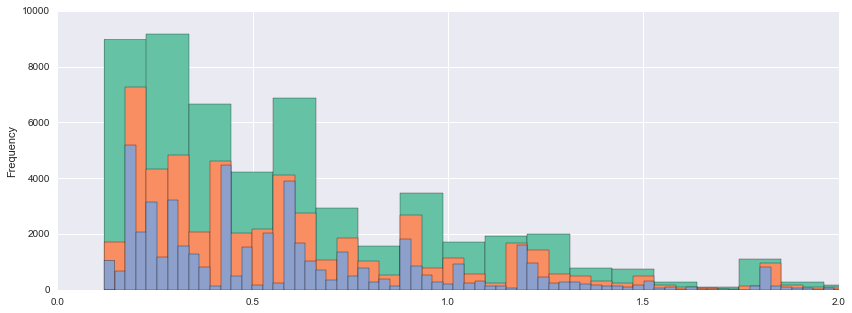

In [42]:
ax = diamonds['volume'].plot.hist(bins=50, xlim=(0,2), figsize=(14,5))
ax = diamonds['volume'].plot.hist(bins=100, xlim=(0,2))
ax = diamonds['volume'].plot.hist(bins=200, xlim=(0,2))

In [43]:
diamonds['volume'].value_counts().sort_values(ascending=False).head(24)

0.179641    2932
0.419162    2548
0.299401    2265
0.604790    2160
0.239521    2025
0.598802    1654
0.538922    1469
0.185629    1061
1.203593    1045
0.898204     976
0.425150     934
0.479042     902
0.305389     884
0.904192     801
0.359281     795
0.191617     671
0.610778     671
0.245509     642
0.137725     590
0.197605     531
1.197605     521
0.718563     512
0.209581     501
0.203593     489
Name: volume, dtype: int64

The histogram of volume is right skewed so I’m going to transform the data using a log transform. The histogram and count of most common values lines up with carat, since volume is a linear transformation of carat.

> **Tip:** Use the following section to summarize your observations during the univariate exploration of your dataset.


## Univariate Analysis

### What is the structure of your dataset?

There are 53,862 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). The variables cut, color, and clarity, are ordered factor variables with the following levels.

(worst) —————-> (best)

**cut:** Fair, Good, Very Good, Premium, Ideal

**color:** J, I, H, G, F, E, D

**clarity:** I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

Other observations:

* Most diamonds are of ideal cut.
* The median carat size is 0.7.
* Most diamonds have a color of G or better.
* About 75% of diamonds have carat weights less than 1.
* The median price for a diamonds \$2401 and the max price is $18,823.


### What is/are the main feature(s) of interest in your dataset?

The main features in the data set are carat and price. I’d like to determine which features are best for predicting the price of a diamond. I suspect carat and some combination of the other variables can be used to build a predictive model to price diamonds.


### Did you create any new variables from existing variables in the dataset?

I created a variable for the volume of diamonds using the density of diamonds and the carat weight of diamonds. This arose in the bivariate section of my analysis when I explored how the price of a diamond varied with its volume. At first volume was calculated by multiplying the dimensions x, y, and z together. However, the volume was a crude approximation since the diamonds were assumed to be rectangular prisms in the initial calculation.

To better approximate the volume, I used the average density of diamonds. 1 carat is equivalent to 2 grams, and the average diamond density is between 3.15 and 3.53 g/cm^3 with pure diamonds having a density close to 3.52 g/cm^3. I used an average density of 3.34 g/cm^3 to estimate the volume of the diamonds.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I log-transformed the right skewed price and volume distributions. The tranformed distribution for price appears bimodal with the price peaking around \$ 800 or so and again around \$ 5000. There’s no diamonds priced at \$ 1500.

When first calculating the volume using x, y, and z, some volumes were 0 or could not be calculated because data was missing. Additionally, some values for the dimensions x, y, and z seemed too large. In the subset called noVolume, all dimensions (x, y, and z) are missing or the z value is 0. The diamonds in this subset tend to be very expensive or fall in the third quartile of the entire diamonds data set.


## Bivariate Plots Section

In [44]:
diamonds.corr()

,carat,table,depth,price,x,y,z,price_log10,price_per_carat,volume
carat,1.000000,0.038357,0.011746,0.856526,0.846252,0.939196,0.773361,0.874278,0.691170,1.000000
table,0.038357,1.000000,0.452638,0.022452,0.051263,0.068140,0.048748,0.025127,0.012003,0.038357
depth,0.011746,0.452638,1.000000,-0.000290,0.012868,0.024870,0.045292,0.021009,0.005940,0.011746
price,0.856526,0.022452,-0.000290,1.000000,0.708345,0.779462,0.628578,0.803173,0.888783,0.856526
x,0.846252,0.051263,0.012868,0.708345,1.000000,0.900407,0.483911,0.831469,0.640674,0.846252
y,0.939196,0.068140,0.024870,0.779462,0.900407,1.000000,0.801409,0.924044,0.705175,0.939196
z,0.773361,0.048748,0.045292,0.628578,0.483911,0.801409,1.000000,0.760652,0.566950,0.773361
price_log10,0.874278,0.025127,0.021009,0.803173,0.831469,0.924044,0.760652,1.000000,0.852023,0.874278
price_per_carat,0.691170,0.012003,0.005940,0.888783,0.640674,0.705175,0.566950,0.852023,1.000000,0.691170
volume,1.000000,0.038357,0.011746,0.856526,0.846252,0.939196,0.773361,0.874278,0.691170,1.000000


The dimensions of a diamond tend to correlate with each other. The longer one dimension, then the larger the diamond is overall. The dimensions also correlate with carat weight which makes sense. Price correlates strongly with carat weight and the three dimensions (x, y, z).

> **Tip:** Be mindful of the number of data points and variables that you put in a correlation matrix or plot matrix: you do not need to include all variables.

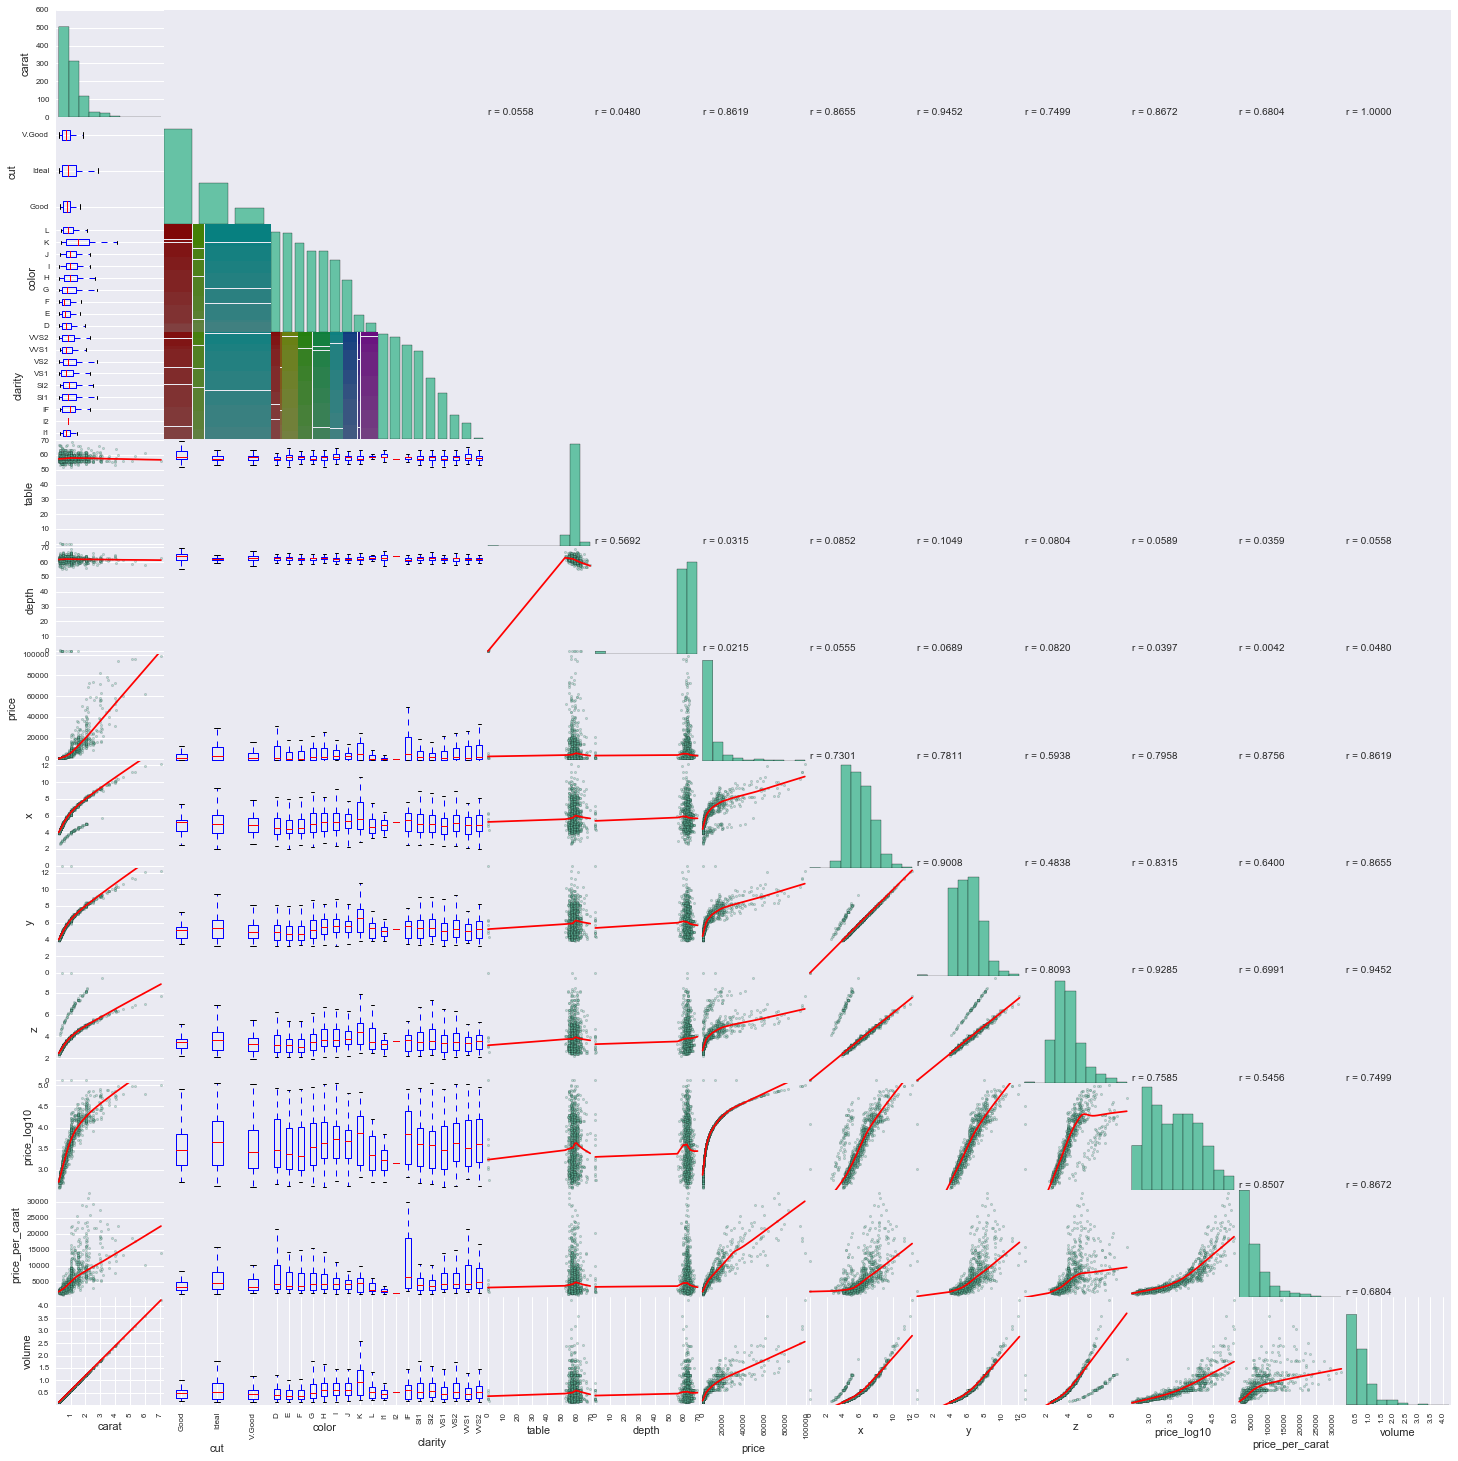

In [45]:
%run 'ggpairs.ipynb'
fig = ggpairs(diamonds.sample(n=1000, random_state = 10), alpha=0.4, figsize=(25,25))

From a subset of the data, cut, color and clarity do not seem to have strong correlations with price, but color and clarity are moderately correlated with carat. I want to look closer at scatter plots involving price and some other variables like carat, depth, and table.

[(0, 20000), (0, 2.5)]

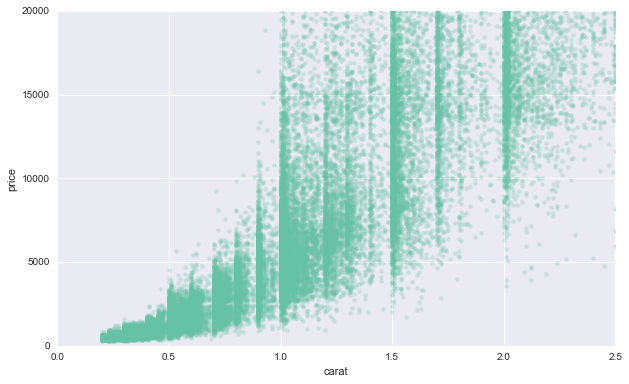

In [46]:
g = sns.regplot(x='carat', y='price', data=diamonds, fit_reg=False, scatter_kws={'alpha':0.25})
g.figure.set_size_inches(10, 6)
g.set(xlim=(0,2.5), ylim=(0, 20000))

As carat size increases, the variance in price increases. We still see vertical bands where many diamonds take on the same carat value at different price points. The relationship between price and carat appears to be exponential rather than linear.

[Coefficient of determination (R squared):](https://en.wikipedia.org/wiki/Coefficient_of_determination)
is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable

In [47]:
x = np.array(diamonds['carat'])
y = np.array(diamonds['price'])
resid = np.polyfit(x,y,deg=1,full=True)[1]
R2 = 1 - resid / (y.size * y.var())  # R squared 
print R2

[ 0.73363761]


Despite the fact that the relationship looks nonlinear, based on the R^2 value, carat still explains about 73 percent of the variance in price.

[(0, 20000), (40, 80)]

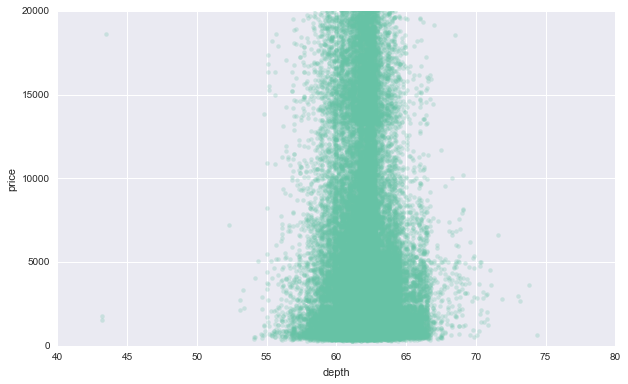

In [48]:
g = sns.regplot(x='depth', y='price', data=diamonds, fit_reg=False, scatter_kws={'alpha':0.25})
g.figure.set_size_inches(10, 6)
g.set(xlim=(40,80), ylim=(0, 20000))

[(0, 20000), (40, 80)]

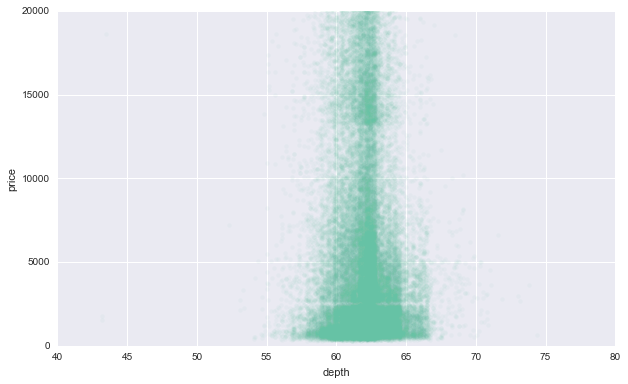

In [49]:
g = sns.regplot(x='depth', y='price', data=diamonds, fit_reg=False, scatter_kws={'alpha':0.05})
g.figure.set_size_inches(10, 6)
g.set(xlim=(40,80), ylim=(0, 20000))

Comparing depth to price, the first plot suffers from some overplotting. Most diamonds have a depth between 60 and 65 (no units), and the lack of correlation seen in the earlier table is easy to see here.

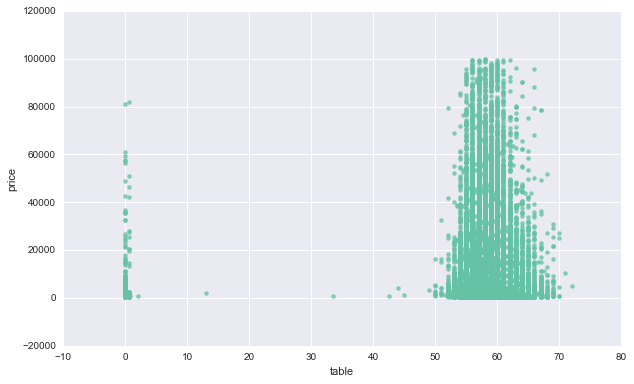

In [50]:
g = sns.regplot(x='table', y='price', data=diamonds, fit_reg=False)
g.figure.set_size_inches(10, 6)

[(0, 20000), (50, 70)]

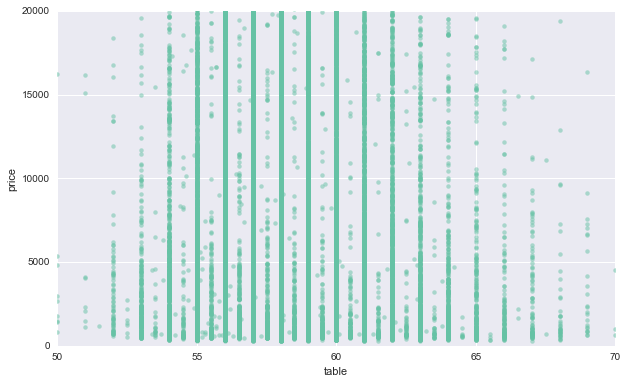

In [51]:
g = sns.regplot(x='table', y='price', data=diamonds, fit_reg=False, scatter_kws={'alpha':0.5})
g.figure.set_size_inches(10, 6)
g.set( xlim=(50,70), ylim=(0,20000))

Again, the tall vertical strips indicate table values are mostly integers. Adding transparency, and changing the plot limits lets us see the slight correlation between table and price.

Next, I’ll look at how the categorical features vary with carat and price.

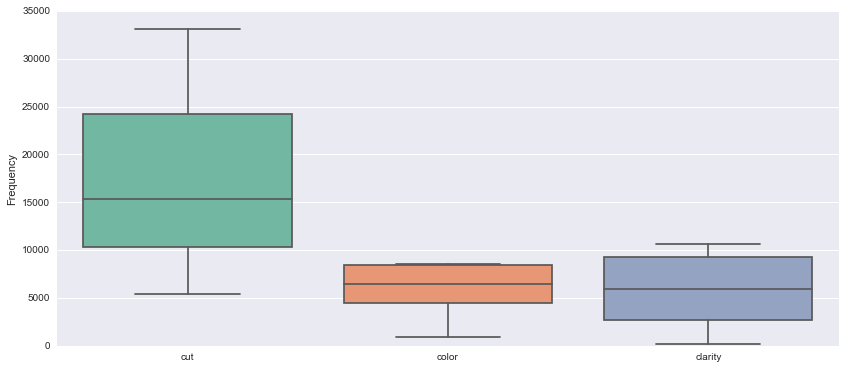

In [52]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=diamonds[['cut', 'color', 'clarity']].apply(pd.value_counts)).set(ylabel = 'Frequency')

[(0, 4)]

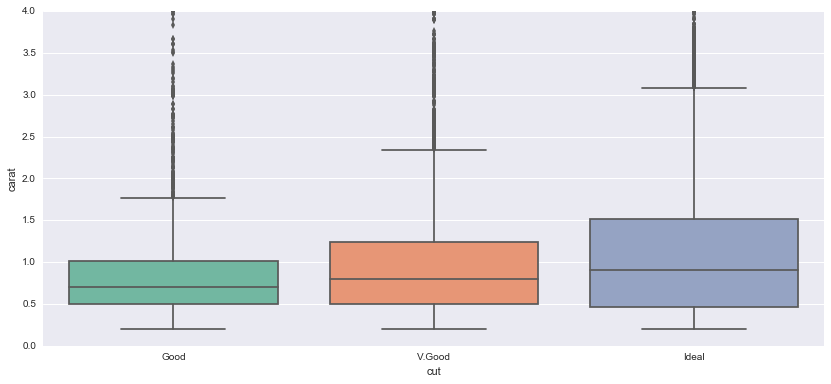

In [53]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='cut', y='carat', data=diamonds, order=['Good', 'V.Good', 'Ideal'])
ax.set(ylim=(0, 4))

In [54]:
diamonds.groupby('cut')['carat'].describe()

cut          
Good    count     5376.000000
        mean         0.911747
        std          0.740302
        min          0.200000
        25%          0.500000
        50%          0.700000
        75%          1.010000
        max          6.700000
Ideal   count    33150.000000
        mean         1.108348
        std          0.830086
        min          0.200000
        25%          0.460000
        50%          0.910000
        75%          1.510000
        max          9.250000
V.Good  count    15336.000000
        mean         1.027481
        std          0.785295
        min          0.200000
        25%          0.500000
        50%          0.800000
        75%          1.240000
        max          7.510000
Name: carat, dtype: float64

It doesn’t look like particular cuts have a certain number of carats. However, it looks like most of the good cut diamonds are on the smaller side, less than one carat.

[(0, 4)]

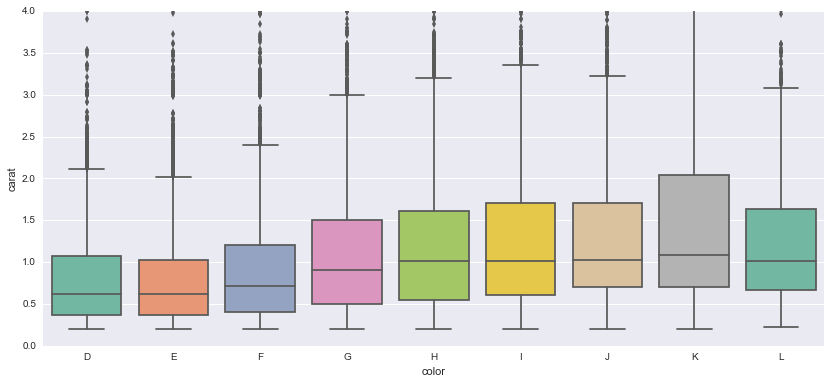

In [55]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='color', y='carat', data=diamonds, order = list('DEFGHIJKL'))
ax.set(ylim=(0, 4))

[(0, 4)]

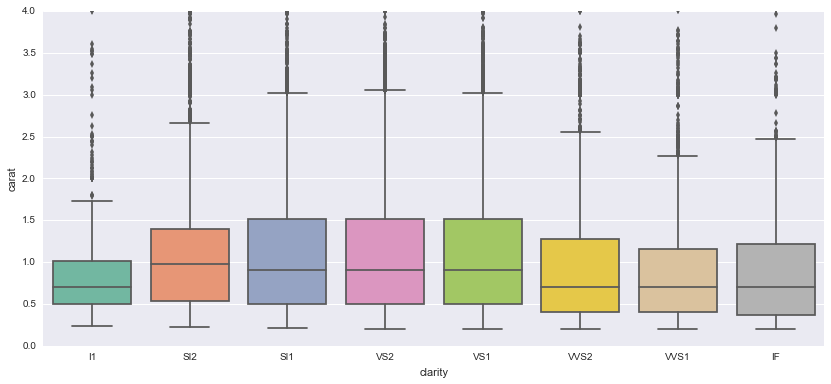

In [56]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='clarity', y='carat', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax.set(ylim=(0, 4))

The trend between carat and color is clearer, with the worst-color diamonds (best color is D and the worst color is K) having the largest median and largest range. Clarity shows a similar trend, and most of the diamonds of 3 carats or larger fall into the worst clarity groups (I1, SI2).

[(0, 40000)]

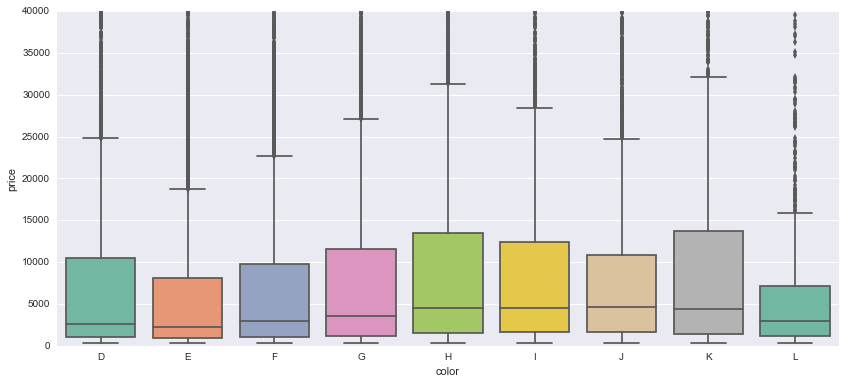

In [57]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='color', y='price', data=diamonds, order = list('DEFGHIJKL'))
ax.set(ylim=(0, 40000))

In [58]:
g = diamonds.groupby('color').describe().reset_index()
g = g[['color', 'level_1', 'price']] 

In [59]:
g[g['level_1']=='50%']

,color,level_1,price
5,D,50%,2647.5
13,E,50%,2297.0
21,F,50%,2929.5
29,G,50%,3571.5
37,H,50%,4543.0
45,I,50%,4504.0
53,J,50%,4660.0
61,K,50%,4365.0
69,L,50%,2931.0


In [60]:
g[g['level_1']=='std']

,color,level_1,price
2,D,std,13099.130357
10,E,std,12137.693678
18,F,std,12725.161418
26,G,std,13386.223047
34,H,std,14138.631640
42,I,std,12827.209054
50,J,std,13480.542865
58,K,std,13381.113718
66,L,std,10584.045369


Here is another surprise. The lowest median price diamonds have a color of D, which is the best color in the data set. Price variance increases as the color decreases (best color is D and the worst color is J). The median price typically decreases as color improves. 

[(0, 40000)]

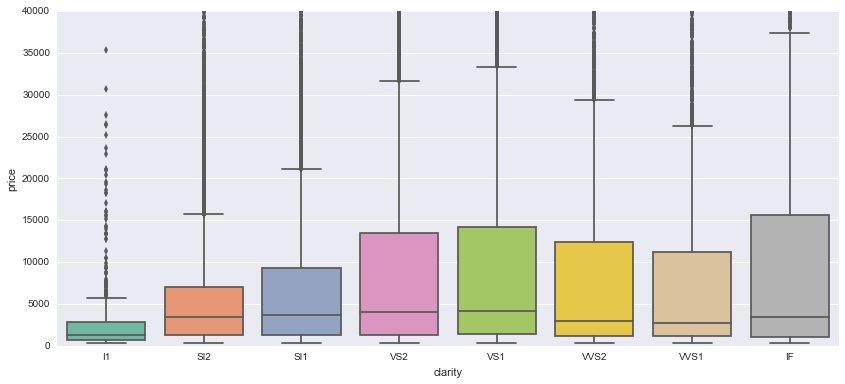

In [61]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='clarity', y='price', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax.set(ylim=(0, 40000))

In [62]:
g = diamonds.groupby('clarity').describe().reset_index()
g = g[['clarity', 'level_1', 'price']] 

In [63]:
g[g['level_1']=='50%']

,clarity,level_1,price
5,I1,50%,1265.0
13,I2,50%,1698.0
21,IF,50%,3488.5
29,SI1,50%,3680.0
37,SI2,50%,3405.5
45,VS1,50%,4200.0
53,VS2,50%,4050.0
61,VVS1,50%,2772.0
69,VVS2,50%,2956.0


Here again, there is a trend that goes against my intuition. The lowest median price occurs for the best clarity (IF). There also to be many more outliers for the better clarity diamonds. I’m not sure why great clarity diamonds are priced so low. Another trend to note here is that price variance increases then decreases significantly as the clarity improves.

I want to look at two things: price per carat, and the distribution of prices for diamonds with best levels of the categorical variables.

## Bivariate Analysis

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Price correlates strongly with carat weight and the three dimensions (x, y, z).

As carat size increases, the variance in price increases. In the plot of price vs carat, there are vertical bands where many diamonds take on the same carat value at different price points. The relationship between price and carat appears to be exponential rather than linear.

Based on the R^2 value, carat explains about 85 percent of the variance in price. Other features of interest can be incorporated into the model to explain the variance in the price.

Diamonds with better levels of clarity, cut, and color tend to occur more often at lower prices while diamonds with worse levels of clarity, cut, and color tend to occur more often at higher prices.

Ideal diamonds have the lowest median price. This seems really unusual since I would expect diamonds with an ideal cut to have a higher median price compared to the other groups. There are many outliers. The variation in price tends to increase as cut improves and then decreases for diamonds with ideal cuts.

The lowest median priced diamonds have a color of D, which is the best color in the data set. Price variance increases as the color decreases (best color is D and the worst color is J). The median price typically decreases as color improves.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The dimensions of a diamond (x, y, and z) tend to correlate with each other. The longer one dimension, then the larger the diamond. The dimensions also correlate with carat weight which makes sense.

### What was the strongest relationship you found?

The price of a diamond is positively and strongly correlated with carat and volume. The variables x, y, and z also correlate with the price but less strongly than carat and volume. Either carat or volume could be used in a model to predict the price of diamonds, however, both variables should not be used since they are measuring the same quality and show perfect correlation.


## Multivariate Plots Section

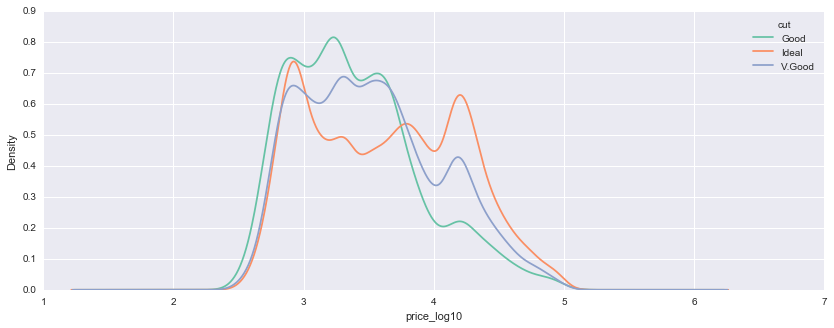

In [64]:
diamonds.groupby('cut')['price_log10'].plot.kde(figsize=(14,5))
plt.axes().set(xlabel='price_log10')
plt.legend(title='cut')

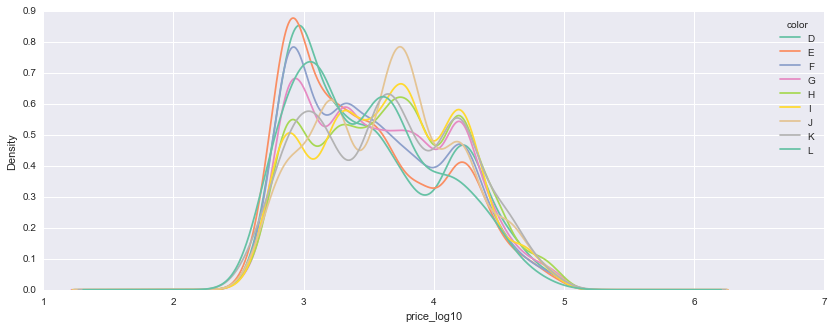

In [65]:
diamonds.groupby('color')['price_log10'].plot.kde(figsize=(14,5))
plt.axes().set(xlabel='price_log10')
plt.legend(title='color')

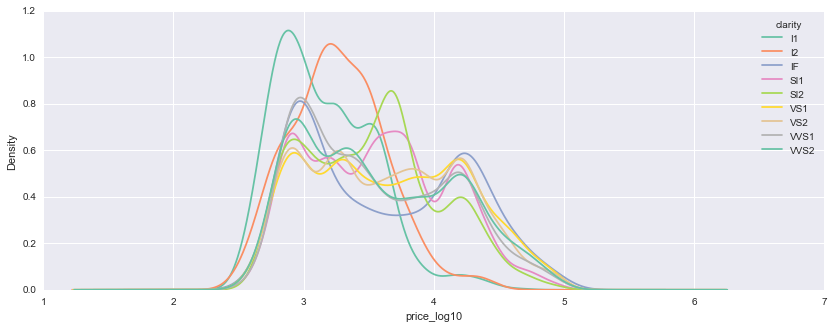

In [66]:
diamonds.groupby('clarity')['price_log10'].plot.kde(figsize=(14,5))
plt.axes().set(xlabel='price_log10')
plt.legend(title='clarity')

These density plots elaborate on the odd trends that were seen in the box plots earlier. Diamonds with better levels of clarity, cut, and color tend to occur more often at lower prices while diamonds with worse levels of clarity, cut, and color tend to occur more often at higher prices. Let’s now take a look at price / carat.

[(0, 20000), <matplotlib.text.Text at 0x290e9fd0>]

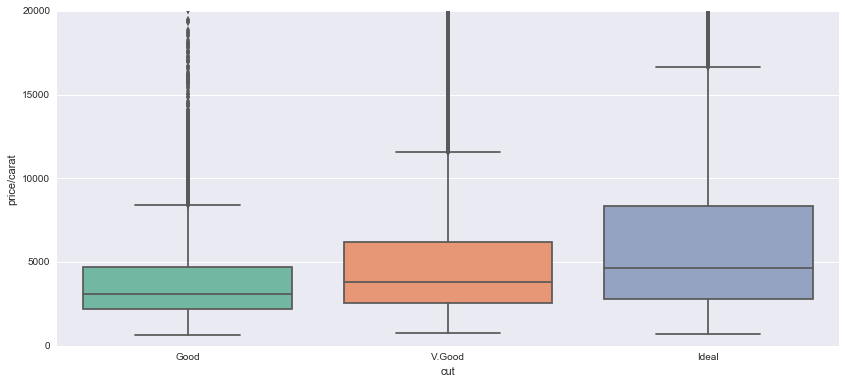

In [67]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='cut', y='price_per_carat', data=diamonds, order=['Good', 'V.Good', 'Ideal'])
ax.set(ylim=(0, 20000), ylabel='price/carat')

In [68]:
diamonds.groupby('cut')[['price_per_carat']].describe()

price_per_carat
cut                          
Good   count      5376.000000
       mean       4117.678432
       std        3282.375218
       min         623.188406
       25%        2211.050725
       50%        3078.431373
       75%        4689.056291
       max       41323.720930
Ideal  count     33150.000000
       mean       6320.204094
       std        4918.533643
       min         734.042553
       25%        2781.250000
       50%        4637.424699
       75%        8338.296925
       max       47138.916256
V.Good count     15336.000000
       mean       5105.745469
       std        3951.152972
       min         750.000000
       25%        2566.666667
       50%        3789.444444
       75%        6176.403509
       max       49519.402985

Wow! Ideal diamonds still have the lowest median for price per carat. The variance across the groups seems to be about the same with Fair cut diamonds having the least variation for the middle 50% of diamonds.

[(0, 20000), <matplotlib.text.Text at 0x28c167b8>]

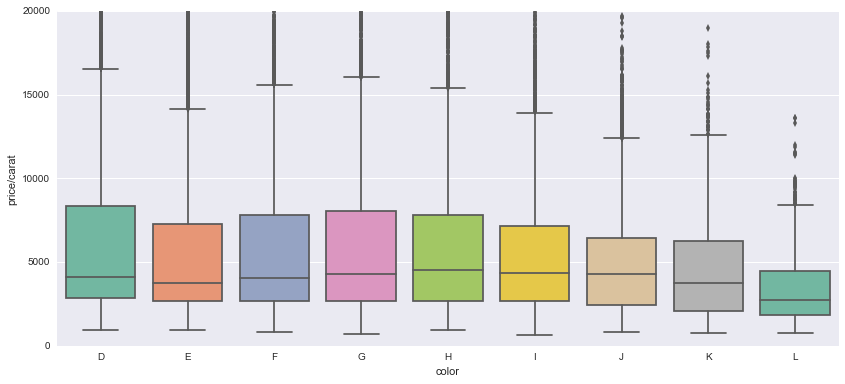

In [69]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='color', y='price_per_carat', data=diamonds, order = list('DEFGHIJKL'))
ax.set(ylim=(0, 20000), ylabel='price/carat')

In [70]:
diamonds.groupby('color')[['price_per_carat']].describe()

price_per_carat
color                       
D     count      6486.000000
      mean       6829.903260
      std        6320.231485
      min         956.521739
      25%        2833.333333
      50%        4089.215686
      75%        8332.435130
      max       49519.402985
E     count      8461.000000
      mean       5869.110505
      std        5064.346819
      min         945.098039
      25%        2666.666667
      50%        3777.777778
      75%        7257.317073
      max       37084.112150
F     count      8450.000000
      mean       5922.494363
      std        4688.660687
      min         844.444444
      25%        2667.993952
      50%        4079.500000
      75%        7838.823529
      max       37084.057971
G     count      8538.000000
      mean       5929.313932
      std        4469.663842
      min         734.042553
      25%        2700.000000
      50%        4271.530495
...                      ...
I     std        3438.320824
      min         623.188406
      25%        2667.442396
      50%        4377.205882
      75%        7168.120968
      max       24239.735099
J     count      4516.000000
      mean       4935.756153
      std        3146.413932
      min         808.888889
      25%        2441.901408
      50%        4316.915842
      75%        6438.155319
      max       19726.190476
K     count      2230.000000
      mean       4541.040535
      std        3004.603411
      min         750.000000
      25%        2056.612447
      50%        3775.996624
      75%        6287.618357
      max       18970.059880
L     count       919.000000
      mean       3489.296981
      std        2268.039267
      min         767.123288
      25%        1818.209459
      50%        2758.252427
      75%        4480.433948
      max       13622.376238

[72 rows x 1 columns]

The best color diamonds (D and E) still have the lowest medians on price per carat. Again, this is an unusual trend. This also seems strange since most diamonds in the data set are not of color D.

[(0, 20000), <matplotlib.text.Text at 0x2942b278>]

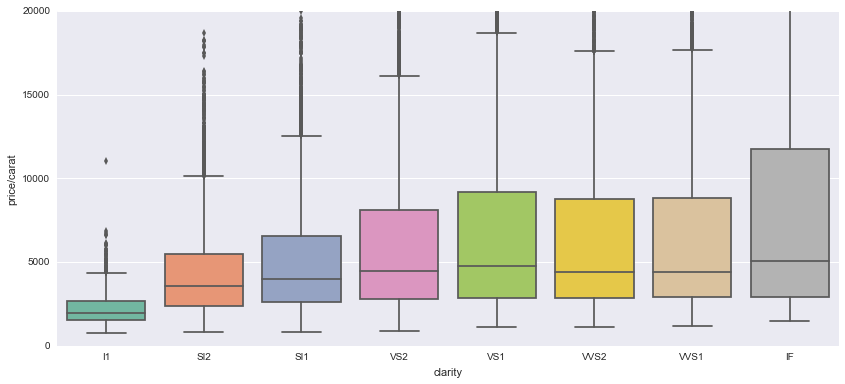

In [71]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='clarity', y='price_per_carat', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax.set(ylim=(0, 20000), ylabel='price/carat')

In [72]:
g = diamonds.groupby('clarity')[['price_per_carat']].describe().reset_index()
g[g['level_1']=='50%']

,clarity,level_1,price_per_carat
5,I1,50%,1934.248120
13,I2,50%,1778.527607
21,IF,50%,5086.719884
29,SI1,50%,4007.777778
37,SI2,50%,3556.490649
45,VS1,50%,4774.647887
53,VS2,50%,4478.512397
61,VVS1,50%,4392.156863
69,VVS2,50%,4403.846154


This plot seems more reasonable. The lowest median price per carat has clarity I1 which is the lowest clarity rating. The median increases slightly then holds relatively constant before decreasing again for the highest clarity. The variance increases then decreases across the clarity levels from worst to best.

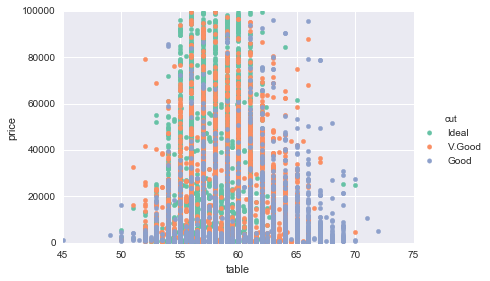

In [73]:
g = sns.FacetGrid(diamonds, hue='cut', size=4, aspect=1.5)
g.map(plt.scatter, 'table', 'price', alpha=1)
g.set(xlim=(45,75), ylim=(0,100000))
g.add_legend();

Let’s take another look at other variables and their correlations with price and try to work towards building a linear model to predict price.

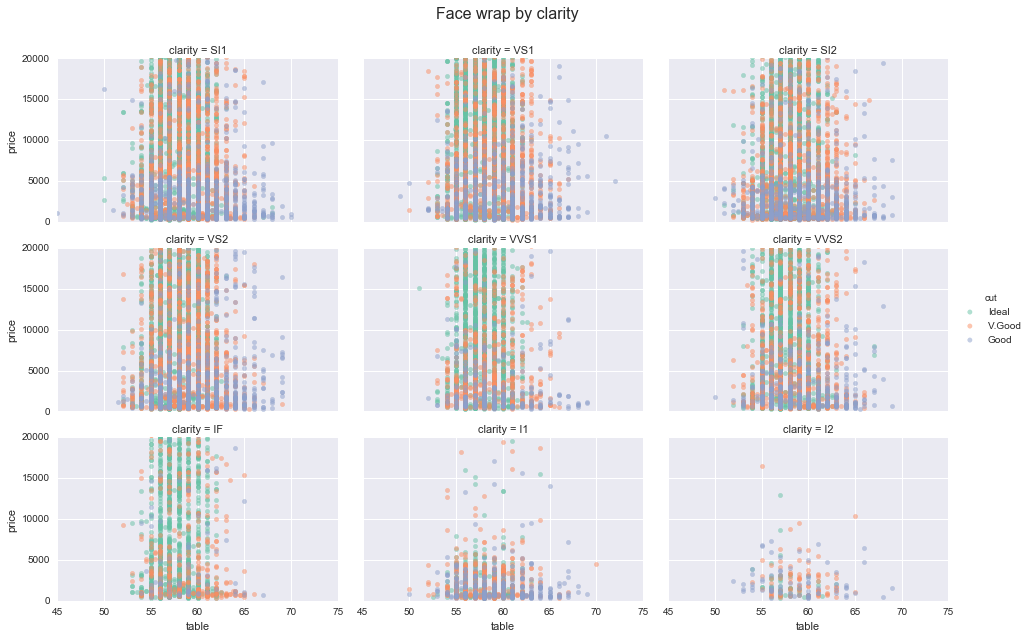

In [74]:
g = sns.FacetGrid(diamonds, col='clarity', hue='cut', col_wrap=3, size=3, aspect=1.5)
g.map(plt.scatter, 'table', 'price', alpha=.5)
g.set(xlim=(45,75), ylim=(0,20000))
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Face wrap by clarity', fontsize=16)

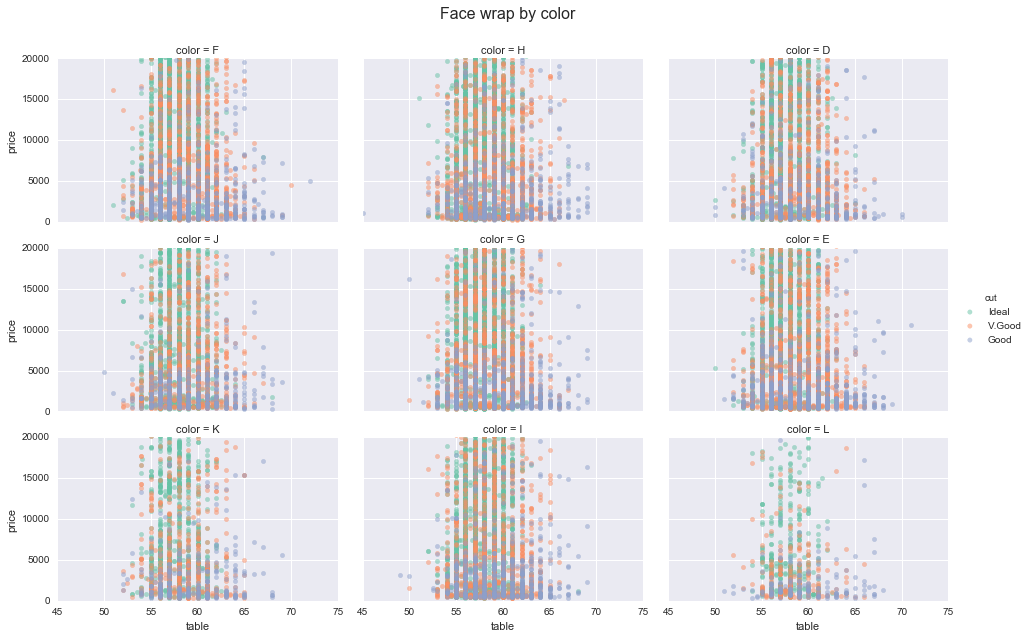

In [75]:
g = sns.FacetGrid(diamonds, col='color', hue='cut', col_wrap=3, size=3, aspect=1.5)
g.map(plt.scatter, 'table', 'price', alpha=.5)
g.set(xlim=(45,75), ylim=(0,20000))
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Face wrap by color', fontsize=16)

Levels of cut cluster by table value. This may make sense based on the type of cut as certain cuts produce certain dimensions. The pattern generally holds across each level of clarity and each level of color with the exception of the lowest clarity.

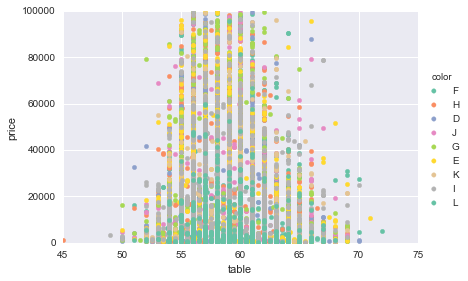

In [76]:
g = sns.FacetGrid(diamonds, hue='color', size=4, aspect=1.5)
g.map(plt.scatter, 'table', 'price', alpha=1)
g.set(xlim=(45,75), ylim=(0,100000))
g.add_legend();

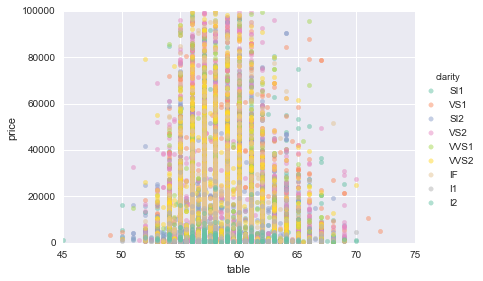

In [77]:
g = sns.FacetGrid(diamonds, hue='clarity', size=4, aspect=1.5)
g.map(plt.scatter, 'table', 'price', alpha=.5)
g.set(xlim=(45,75), ylim=(0,100000))
g.add_legend()

Color and clarity are not correlated with table, nothing particularly stands out.

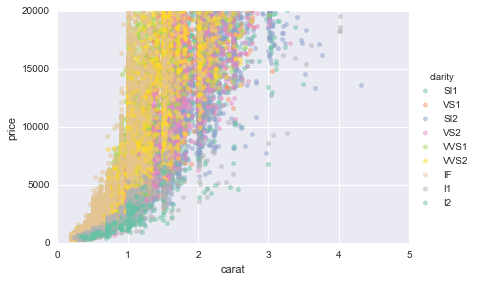

In [78]:
g = sns.FacetGrid(diamonds, hue='clarity', size=4, aspect=1.5)
g.map(plt.scatter, 'carat', 'price', alpha=.5)
g.set(xlim=(0,5), ylim=(0,20000))
g.add_legend()

In [79]:
diamonds['carat_0.33'] = np.power(diamonds['carat'], 1/3.0)

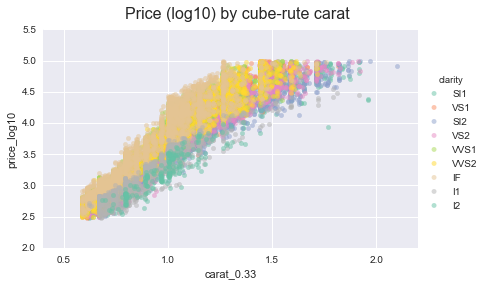

In [80]:
g = sns.FacetGrid(diamonds, hue='clarity', size=4, aspect=1.5)
g.map(plt.scatter, 'carat_0.33', 'price_log10', alpha=.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price (log10) by cube-rute carat', fontsize=16)
g.add_legend()

We look at the categorical variables against the main price vs. carat relationship. Applying a log transform to price and cube-root transform to carat produces a more linear trend. If we account for constant carat value, better clarity produces a higher-priced diamond.

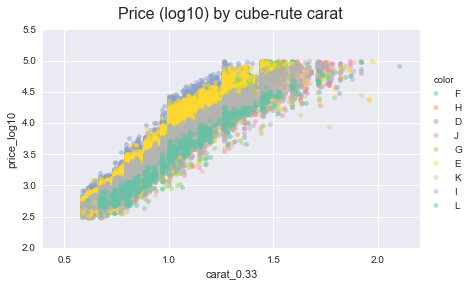

In [81]:
g = sns.FacetGrid(diamonds, hue='color', size=4, aspect=1.5)
g.map(plt.scatter, 'carat_0.33', 'price_log10', alpha=.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price (log10) by cube-rute carat', fontsize=16)
g.add_legend()

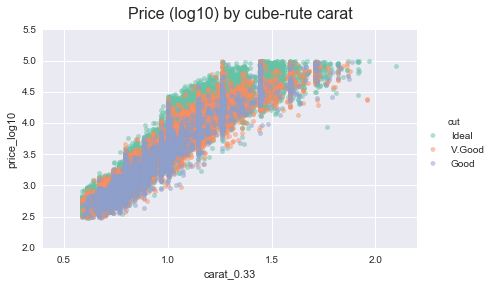

In [82]:
g = sns.FacetGrid(diamonds, hue='cut', size=4, aspect=1.5)
g.map(plt.scatter, 'carat_0.33', 'price_log10', alpha=.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price (log10) by cube-rute carat', fontsize=16)
g.add_legend()

Diamonds with better color tend to be priced higher holding volume constant. This trend is not as clear when looking at price vs volume and clarity, but the trend is still present. Price does not vary as much on cut holding carat constant; the pattern is not noticeable here.

The last 3 plots suggest that we can build a linear model and use those variables in the linear model to predict the price of a diamond.

In [83]:
from sklearn import linear_model

def regr(list_of_numerical, list_of_categorical):
    y = diamonds['price_log10']
    m = linear_model.LinearRegression()
    H = diamonds[list_of_numerical]
    if list_of_categorical != []:
        H = pd.concat([H, pd.get_dummies(diamonds[list_of_categorical])], axis=1)
    m.fit(H, y)
    resid = np.mean((m.predict(H) - y) ** 2)
    print resid, 1 - resid / (y.size * y.var()) #residual,  R squared

list_of_numerical = ['carat_0.33']
list_of_categorical = []
regr(list_of_numerical, list_of_categorical)

list_of_numerical.append('carat')
regr(list_of_numerical, list_of_categorical)

list_of_categorical = ['cut']
regr(list_of_numerical, list_of_categorical)

list_of_categorical.append('color')
regr(list_of_numerical, list_of_categorical)

list_of_categorical.append('clarity')
regr(list_of_numerical, list_of_categorical)

0.0337064004336 0.999998046481
0.0283138030737 0.99999835902
0.0268388241652 0.999998444505
0.0187027588772 0.999998916046
0.0100500365172 0.999999417531


The variables in this linear model can account for 99.9999417531% of the variance in the price of diamonds. Even with the log transformation of price and cube-root transformation on carat alone, we account for 99.9998046481% of the variace, compared to 73% without the transformation.

## Multivariate Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Ideal diamonds also have the lowest median for price per carat. The variance across the groups seems to be about the same with Fair cut diamonds having the least variation for the middle 50% of diamonds.

Holding carat weight constant, diamonds with lower clarity are almost always cheaper than diamonds with better clarity (worst clarity is I1 and best clarity is IF). This also applies to a lesser extent with color.

The last three plots from the Multivariate section suggest that I can build a linear model and use those variables in the model to predict the price of a diamond. The results of the model are summarized below.

### Were there any interesting or surprising interactions between features?

Levels of cut cluster by table value. This resonates with me because I think certain diamond cuts would produce particular dimensions (x, y, and z). The pattern holds across each level of clarity and each level of color with the exception of the lowest clarity.

### OPTIONAL: Did you create any models with your dataset? Discuss the strengths and limitations of your model.

Yes, I created a linear model starting from the log of Price and the Cube-Root of carat.

The variables in the linear model account for 98.4% of the variance in the price of diamonds. The addition of the cut variable to the model slightly improves the R^2 value by one tenth of a percent, which is expected based on the visualization above of Log10 Price vs. Cube-Root Carat and Cut. Clarity and color improved the model to greater degrees.

## Final Plots and Summary

> **Tip:** Polish up the plots that you explored earlier in the report in the final plots section. Make sure you label and title the plots, and provide a description of what can be observed in each of the chosen plots.


### Plot One

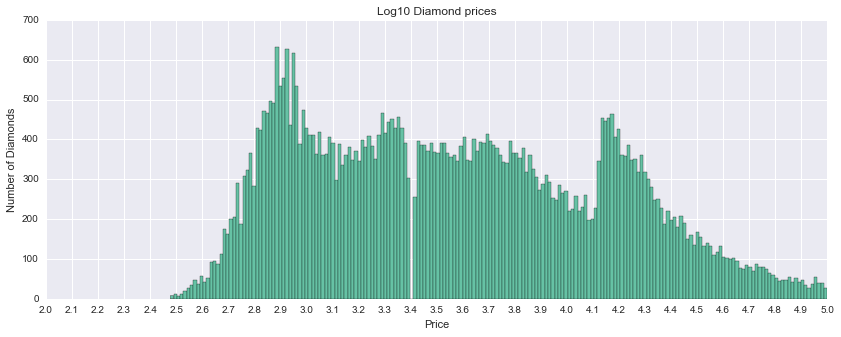

In [84]:
ax = diamonds['price_log10'].hist(bins = 200, figsize = (14, 5))\
     .set(title = 'Log10 Diamond prices',xlabel = 'Price', ylabel = 'Number of Diamonds', xticks = np.linspace(2, 5, 31))

In [85]:
np.power(10, 3.4)

2511.8864315095798

### Description One

The distribution of diamond prices appears to be bimodal on log scale, perhaps due to the demand of diamonds and buyers purchasing in two different ranges of price points. There is a curious gap in prices at the $2500 point.


### Plot Two

[(0, 40000)]

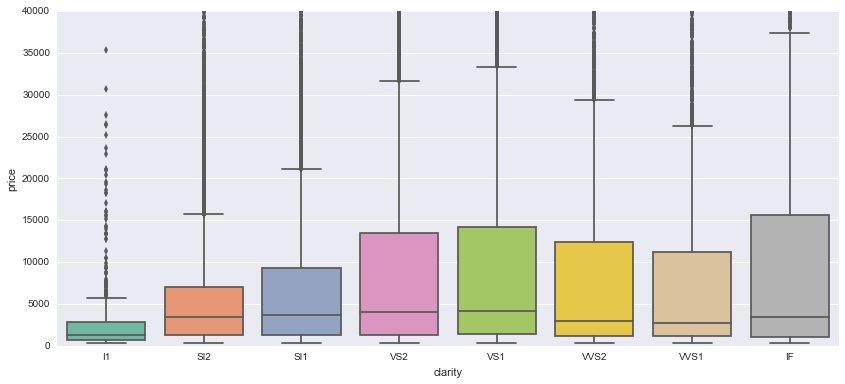

In [86]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='clarity', y='price', data=diamonds, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
ax.set(ylim=(0, 40000))

In [87]:
diamonds.head()

,carat,cut,color,clarity,table,depth,price,x,y,z,price_log10,price_per_carat,volume,carat_0.33
569929,2.01,Ideal,F,SI1,58.0,62.3,24639.0,5.00,7.98,8.10,4.391623,12258.208955,1.203593,1.262017
52945,0.30,Ideal,H,VS1,54.0,62.4,710.0,4.29,4.31,2.68,2.851258,2366.666667,0.179641,0.669433
120148,0.40,Ideal,D,SI2,58.5,61.4,1000.0,4.72,4.75,2.91,3.000000,2500.000000,0.239521,0.736806
234239,0.80,V.Good,J,VS1,57.0,63.0,2173.0,5.87,5.90,3.71,3.337060,2716.250000,0.479042,0.928318
418491,1.63,Ideal,H,SI2,58.0,63.0,8331.0,0.00,0.00,4.68,3.920697,5111.042945,0.976048,1.176872


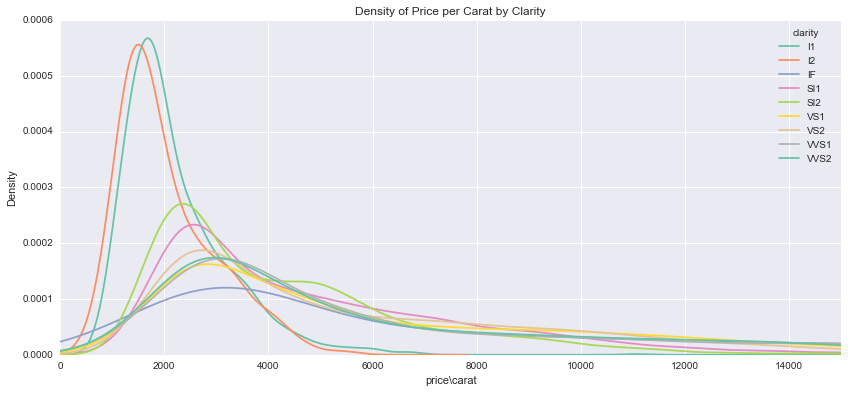

In [88]:
diamonds.groupby('clarity')['price_per_carat'].plot.kde(figsize=(14,6))
plt.axes().set(title = 'Density of Price per Carat by Clarity', xlabel='price\carat', xlim = (0, 15000))
plt.legend(title='clarity')

### Description Two

Diamonds with the best level of clarity (IF) have the lowest median price. A greater proportion of diamonds with the best clarity are priced lower compared to the proportion of diamonds in price distributions for worse levels of clarity. Price variance increases as the clarity improves (worst clarity is I1).


### Plot Three

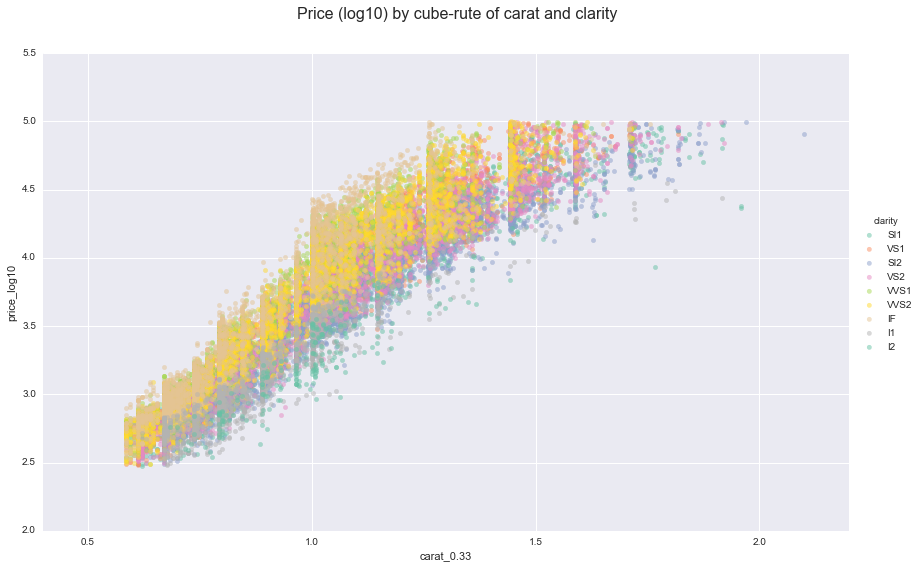

In [89]:
g = sns.FacetGrid(diamonds, hue='clarity', size=8, aspect=1.5)
g.map(plt.scatter, 'carat_0.33', 'price_log10', alpha=.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price (log10) by cube-rute of carat and clarity', fontsize=16)
g.add_legend()

### Description Three

The plot indicates that a linear model could be constructed to predict the price of variables using log10(price) as the outcome variable and cube-root of carat as the predictor variable. Holding carat weight constant, diamonds with higher clarity levels (I1 is worst and IF is best) are almost always cheaper than diamonds with better clarity to account for additional variability in prices.

## Reflection

The diamonds data set contains information on almost 54,000 thousand diamonds across ten variables from around 2008. I started by understanding the individual variables in the data set, and then I explored interesting questions and leads as I continued to make observations on plots. Eventually, I explored the price of diamonds across many variables and created a linear model to predict diamond prices.

There was a clear trend between the volume or carat weight of a diamond and its price. I was surprised that depth or table did not have a strong positive correlation with price, but these variables are likely to be represented by categorical variables: color, cut, and clarity. I struggled understanding the decrease in median price as the level of cut and clarity improved, but this became more clear when I realized that most of the data contained ideal cut diamonds. For the linear model, all diamonds were included since information on price, carat, color, clarity, and cut were available for all the diamonds. After transforming price to log scale and taking the cube root of carat, the model was able to account for 98.4% of the variance in the dataset.

Some limitations of this model include the source of the data. Given that the diamonds date to 2008, the model would likely undervalue diamonds in the market today, either due to changes in demand and supply or inflation rates. To investigate this data further, I would examine how values of 0 were introduced into the data set for the variables x, y, and z, and the derived volume variable. I would be interested in testing the linear model to predict current diamond prices and to determine to what extent the model is accurate at pricing diamonds. A more recent dataset would be better to make predictions of diamond prices, and comparisons might be made between the other linear models to see if other variables may account for diamond prices.
